In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.head(100)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
95,1,TRANSFER,710544.77,C835773569,0.0,0.00,C1359044626,738531.50,16518.36,0,0
96,1,TRANSFER,581294.26,C843299092,0.0,0.00,C1590550415,5195482.15,19169204.93,0,0
97,1,TRANSFER,11996.58,C605982374,0.0,0.00,C1225616405,40255.00,0.00,0,0
98,1,PAYMENT,2875.10,C1412322831,15443.0,12567.90,M1651262695,0.00,0.00,0,0


#Dataset information step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

#Data Checks to perform

Data cleaning including missing values, outliers and multi-collinearity.
Describe your fraud detection model in elaboration.
How did you select variables to be included in the model?
Demonstrate the performance of the model by using best set of tools.
What are the key factors that predict fraudulent customer?
Do these factors make sense? If yes, How? If not, How not?
What kind of prevention should be adopted while company update its infrastructure?
Assuming these actions have been implemented, how would you determine if they work?

In [5]:
df.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
6362615,False,False,False,False,False,False,False,False,False,False,False
6362616,False,False,False,False,False,False,False,False,False,False,False
6362617,False,False,False,False,False,False,False,False,False,False,False
6362618,False,False,False,False,False,False,False,False,False,False,False


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  6354407
Number of Fraud transactions:  8213
Percentage of Legit transactions: 99.8709 %
Percentage of Fraud transactions: 0.1291 %


These results prove that this is a highly unbalanced data as Percentage of Legit transactions= 99.87 % and Percentage of Fraud transactions= 0.13 %. SO DECISION TREES AND RANDOM FORESTS ARE GOOD METHODS FOR IMBALANCED DATA.

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

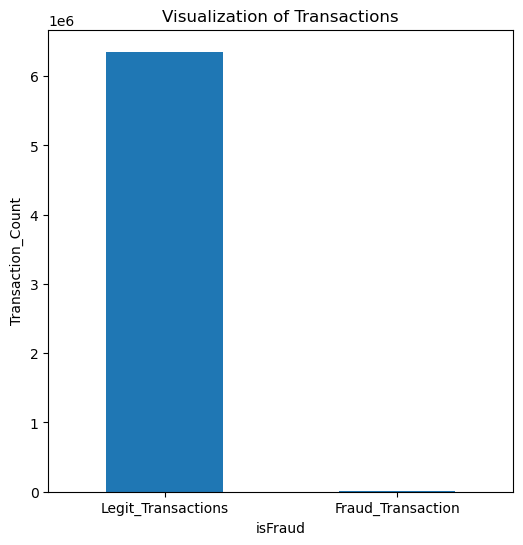

In [9]:
plt.figure(figsize=(6,6))
labels = ["Legit_Transactions", "Fraud_Transaction"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Transactions")
plt.ylabel("Transaction_Count")
plt.xticks(range(2), labels)
plt.show()

In [10]:
#creating a copy of original dataset to train and test the models

new_dataset=df.copy()
new_dataset.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [11]:
# Checking if there are any attributes with dtype: object

new_List = new_dataset.select_dtypes(include = "object").columns
print ("Variables with datatype - 'object' are:")
print (new_List)

Variables with datatype - 'object' are:
Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [12]:
#Label Encoding for object to numeric conversion

label_encode = LabelEncoder()

for i in new_List:
    new_dataset[i] = label_encode.fit_transform(new_dataset[i].astype(str))

print (new_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int32  
 2   amount          float64
 3   nameOrig        int32  
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        int32  
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int32(3), int64(3)
memory usage: 461.2 MB
None


#Multicolinearity Checking

In [13]:
#importing related Dependencies
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [14]:
def calc_vif(transaction_data):

    # Calculating Variance Inflation Factor
    vif = pd.DataFrame()
    vif["Variables"] = transaction_data.columns
    vif["VIF"] = [variance_inflation_factor(transaction_data.values, i) for i in range(transaction_data.shape[1])]

    return(vif)

calc_vif(new_dataset)

,Variables,VIF
0,step,2.791610
1,type,4.467405
2,amount,4.149312
3,nameOrig,2.764234
4,oldbalanceOrg,576.803777
5,newbalanceOrig,582.709128
6,nameDest,3.300975
7,oldbalanceDest,73.349937
8,newbalanceDest,85.005614
9,isFraud,1.195305


#There are three highly correlated variables which are:

nameOrig-nameDest, oldbalanceOrg-newbalanceOrig and oldbalanceDest-newbalanceDest

After combinning these pairs,deopping the individual ones

In [15]:
#concatinating columns

new_dataset['balance_orig'] = new_dataset.apply(lambda x: x['oldbalanceOrg'] - x['newbalanceOrig'],axis=1)
new_dataset['balance_dest'] = new_dataset.apply(lambda x: x['oldbalanceDest'] - x['newbalanceDest'],axis=1)
new_dataset['name'] = new_dataset.apply(lambda x: x['nameOrig'] + x['nameDest'],axis=1)

#dropping columns
new_dataset = new_dataset.drop(['oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest','nameOrig','nameDest'],axis=1)

calc_vif(new_dataset)

,Variables,VIF
0,step,2.710678
1,type,2.863989
2,amount,3.890535
3,isFraud,1.189937
4,isFlaggedFraud,1.002563
5,balance_orig,1.332185
6,balance_dest,3.790322
7,name,3.472358


In [16]:
#importing dependencies

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [17]:
X = new_dataset.drop(columns='isFraud', axis=1)
Y = new_dataset['isFraud']

In [18]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (4453834, 7)
Shape of X_test:  (1908786, 7)


In [19]:
# Decision tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [20]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

In [21]:
# Logistic Regression

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, Y_train)

Y_pred_lr = logistic_regression.predict(X_test)
logistic_regression_score = logistic_regression.score(X_test, Y_test) * 100

In [22]:
print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)
print("Logistic Regression Score: ", logistic_regression_score)

Decision Tree Score:  99.94200502308797
Random Forest Score:  99.96358942280591
Logistic Regression Score:  99.87898067148438


In [23]:
# Decision Tree

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report for Decision Tree:")
print(classification_report_dt)

# Random Forest

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report for Random Forest:")
print(classification_report_rf)

# Logistic Regression

classification_report_lr = classification_report(Y_test, Y_pred_lr)
print("Classification Report for Logistic Regression:")
print(classification_report_lr)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.77      0.77      0.77      2435

    accuracy                           1.00   1908786
   macro avg       0.89      0.89      0.89   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.97      0.73      0.84      2435

    accuracy                           1.00   1908786
   macro avg       0.99      0.87      0.92   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.54      0.36      0.43      2435

    accuracy                           1.00   1908786

Conclusion
We can see the Accuracy of Decision Tree and Random Forest is almost same. Precision is a crucial factor to predict correctly. The Precision and f1-score for Random Forest is way better than other two. So, Random Forest is the best option. There is no way of taking Logistic regression.

With the help of Correlation Heatmap, we have selected the variables.

Source of the transaction request,legitimacy of the requesting

organisation/individual could be the key factors to predict fraudulent customer.

verified software, usage of VPN, keeping contact with bank, keep updated

software on mobile/pc, using secure websites can prevent this kind of transactions

Thank You.